In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#3 regressioni, una per ogni variabile quantitativa e con terget

In [2]:
dati=pd.read_csv("./penguins_size.csv")
dati

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
cols_with_missing=[col for col in dati.columns if dati[col].isnull().sum()]
print(cols_with_missing)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [6]:
selected_cols=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]#colonne di interesse
d=dati.dropna(axis="index", subset=selected_cols)

In [7]:
X0=d["culmen_length_mm"].values
X1=d["culmen_depth_mm"].values
X2=d["flipper_length_mm"].values
y=d["body_mass_g"].values
X=[X0, X1, X2]


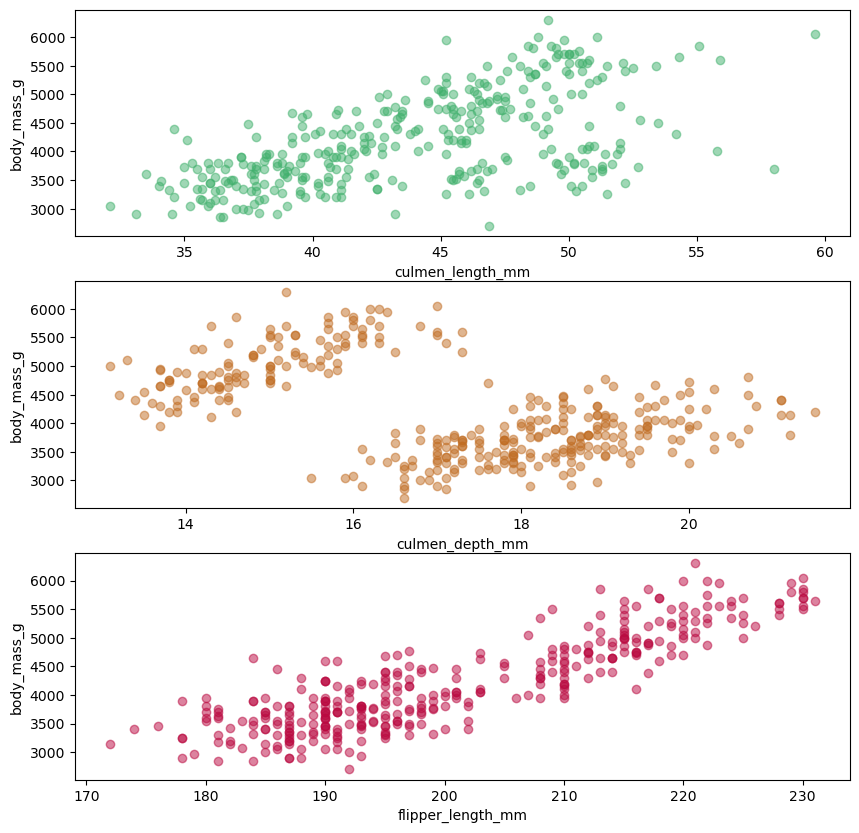

In [7]:
nrows=3
ncols=1
fig, axs=plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,10))
for i in range(nrows):
    axs[i].scatter(X[i], y, color=np.random.uniform(0,1,3), alpha=0.5)
    axs[i].set_xlabel(selected_cols[i])
    axs[i].set_ylabel("body_mass_g")

In [9]:
regressione_0=LinearRegression()
regressione_0.fit(X0[:, np.newaxis], y)#realizza l'apprendimento come la classificazione
m0=regressione_0.coef_
q0=regressione_0.intercept_
print(f"R^2 vale: {regressione_0.score(X0[:, np.newaxis], y):.2f}")#stessi parametri di fit
print(f"m vale: {m0}, q vale: {q0}")#stessi parametri di fit

R^2 vale: 0.35
m vale: [87.41527705], q vale: 362.30672165392116


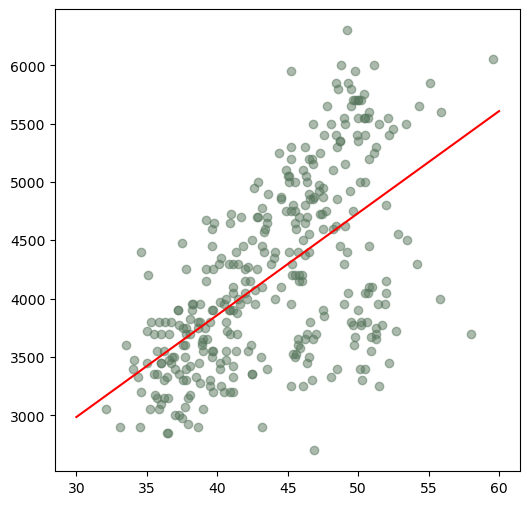

In [10]:
fig, ax=plt.subplots( figsize=(6,6))
array_x=np.linspace(30,60, 100)
array_y=m0*array_x+q0
ax.scatter(X0, y, color=np.random.uniform(0,1,3), alpha=0.5)
ax.plot(array_x, array_y, c="r",)
plt.show()

In [11]:
regressione_1=LinearRegression()
regressione_1.fit(X1[:, np.newaxis], y)#realizza l'apprendimento come la classificazione
m1=regressione_1.coef_
q1=regressione_1.intercept_
print(f"R^2 vale: {regressione_1.score(X1[:, np.newaxis], y):.2f}")#stessi parametri di fit
print(f"m vale: {m1}, q vale: {q1}")#stessi parametri di fit

R^2 vale: 0.22
m vale: [-191.64279133], q vale: 7488.652400935166


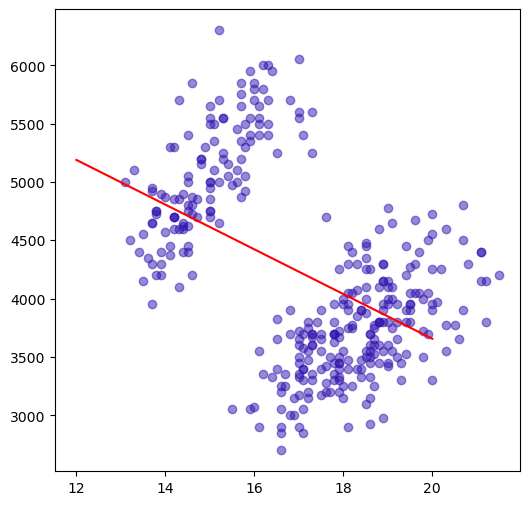

In [12]:
fig, ax=plt.subplots( figsize=(6,6))
array_x=np.linspace(12, 20, 100)
array_y1=m1*array_x+q1
ax.scatter(X1, y, color=np.random.uniform(0,1,3), alpha=0.5)
ax.plot(array_x, array_y1, c="r",)
plt.show()

In [13]:
regressione_2=LinearRegression()
regressione_2.fit(X2[:, np.newaxis], y)#realizza l'apprendimento come la classificazione
m2=regressione_2.coef_
q2=regressione_2.intercept_
print(f"R^2 vale: {regressione_2.score(X2[:, np.newaxis], y):.2f}")#stessi parametri di fit
print(f"m vale: {m2}, q vale: {q2}")#stessi parametri di fit

R^2 vale: 0.76
m vale: [49.68556641], q vale: -5780.831358077065


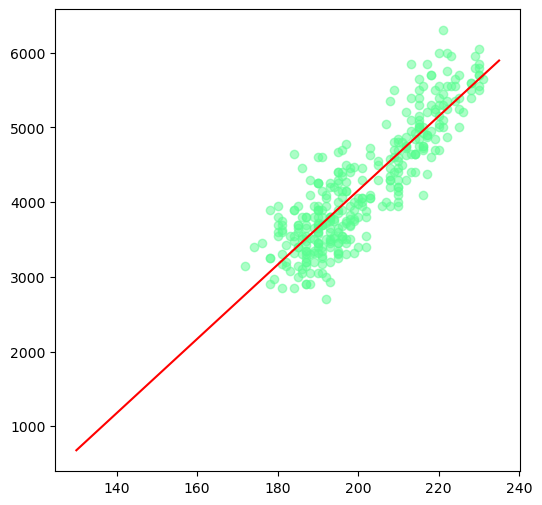

In [14]:
fig, ax=plt.subplots( figsize=(6,6))
array_x=np.linspace(130, 235, 100)
array_y2=m2*array_x+q2
ax.scatter(X2, y, color=np.random.uniform(0,1,3), alpha=0.5)
ax.plot(array_x, array_y2, c="r",)
plt.show()

alla regressione è possibile passare matrici

In [16]:
X4=d[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm" ]].values

In [17]:
regressione_4=LinearRegression()
regressione_4.fit(X4, y)#realizza l'apprendimento come la classificazione
m1=regressione_4.coef_
q1=regressione_4.intercept_
print(f"R^2 vale: {regressione_4.score(X4, y):.2f}")#stessi parametri di fit
print(f"m vale: {m1}, q vale: {q1}")#stessi parametri di fit

R^2 vale: 0.76
m vale: [ 4.16182047 20.04953313 50.26922164], q vale: -6424.764698098585


In [ ]:
import seaborn as sns#si basa su matplotlib
#analisi grafica
sns.set_theme(font_scale=2)
sns.pairplot(data, hue="specie", dropna=True)
sns.set()